In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pcos-diagnosis-dataset/pcos_dataset.csv


In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/kaggle/input/pcos-diagnosis-dataset/pcos_dataset.csv')
df.head()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0


In [5]:
df.isnull().sum()

Age                          0
BMI                          0
Menstrual_Irregularity       0
Testosterone_Level(ng/dL)    0
Antral_Follicle_Count        0
PCOS_Diagnosis               0
dtype: int64

In [6]:
df.describe()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,31.771000,26.38700,0.530000,60.159500,17.469000,0.199000
std,8.463462,4.93554,0.499349,23.160204,7.069301,0.399448
min,18.000000,18.10000,0.000000,20.000000,5.000000,0.000000
25%,24.000000,21.90000,0.000000,41.700000,12.000000,0.000000
50%,32.000000,26.40000,1.000000,60.000000,18.000000,0.000000
75%,39.000000,30.50000,1.000000,80.300000,23.250000,0.000000
max,45.000000,35.00000,1.000000,99.800000,29.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   BMI                        1000 non-null   float64
 2   Menstrual_Irregularity     1000 non-null   int64  
 3   Testosterone_Level(ng/dL)  1000 non-null   float64
 4   Antral_Follicle_Count      1000 non-null   int64  
 5   PCOS_Diagnosis             1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


In [8]:
df[df.duplicated()]

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis


****Data Visualization****

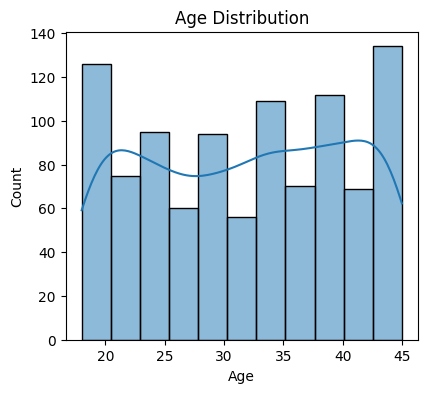

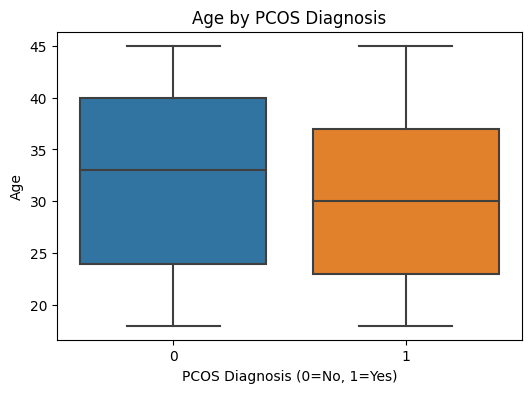

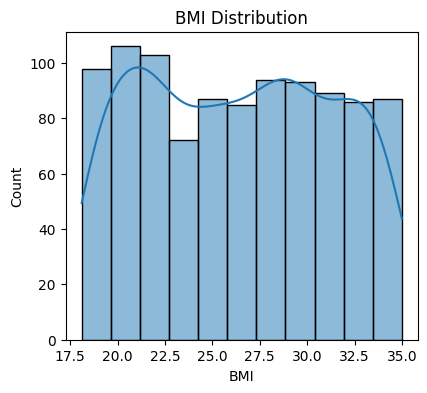

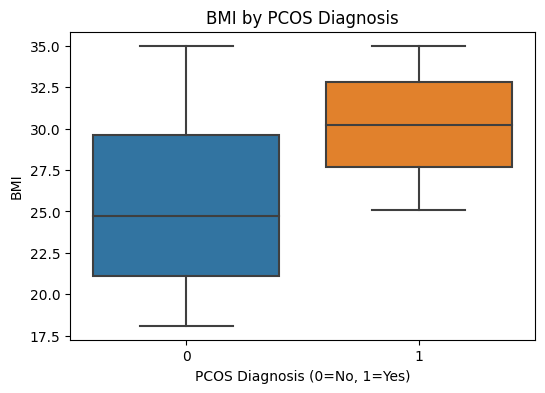

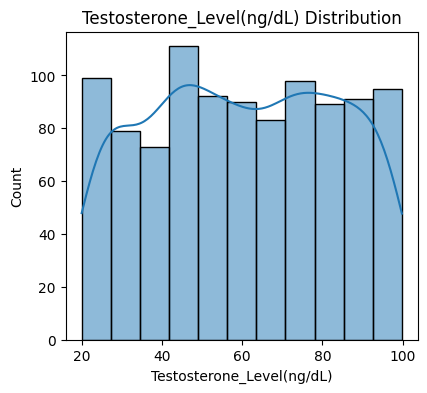

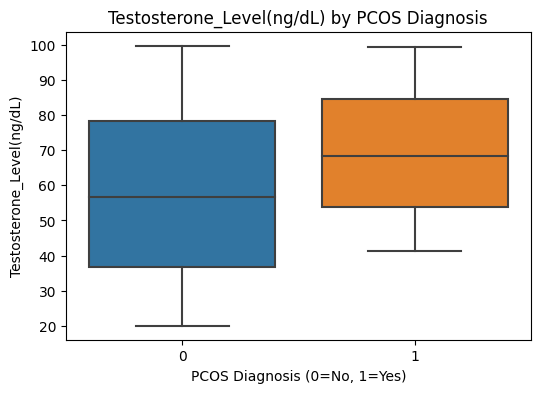

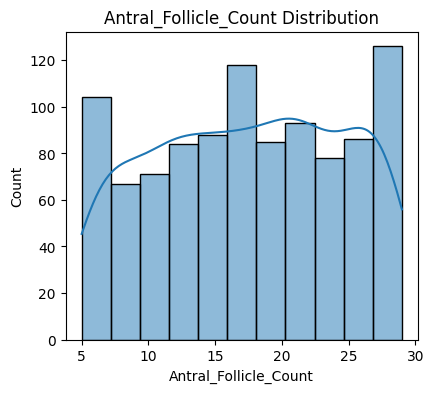

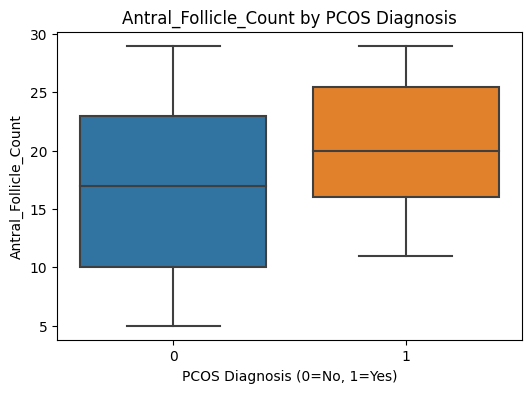

In [9]:
numerical_columns = ['Age', 'BMI', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count']
for col in numerical_columns:
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')

   
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=col, x='PCOS_Diagnosis', data=df)
    plt.title(f'{col} by PCOS Diagnosis')
    plt.xlabel("PCOS Diagnosis (0=No, 1=Yes)")
    plt.ylabel(col)
    plt.show()


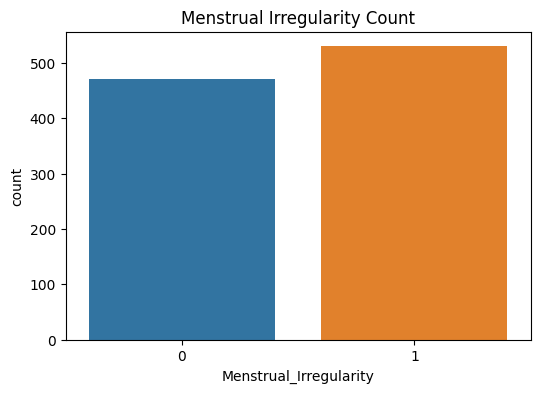

In [10]:
# Menstrual Irregularity Counts
plt.figure(figsize=(6,4))
sns.countplot(x='Menstrual_Irregularity', data=df)
plt.title('Menstrual Irregularity Count')
plt.show()

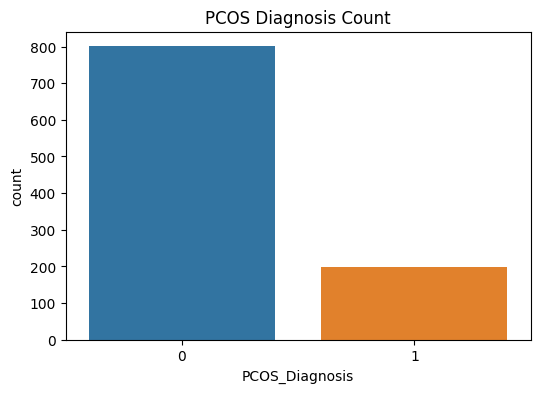

In [11]:
# PCOS Diagnosis Class Balance
plt.figure(figsize=(6,4))
sns.countplot(x='PCOS_Diagnosis', data=df)
plt.title('PCOS Diagnosis Count')
plt.show()

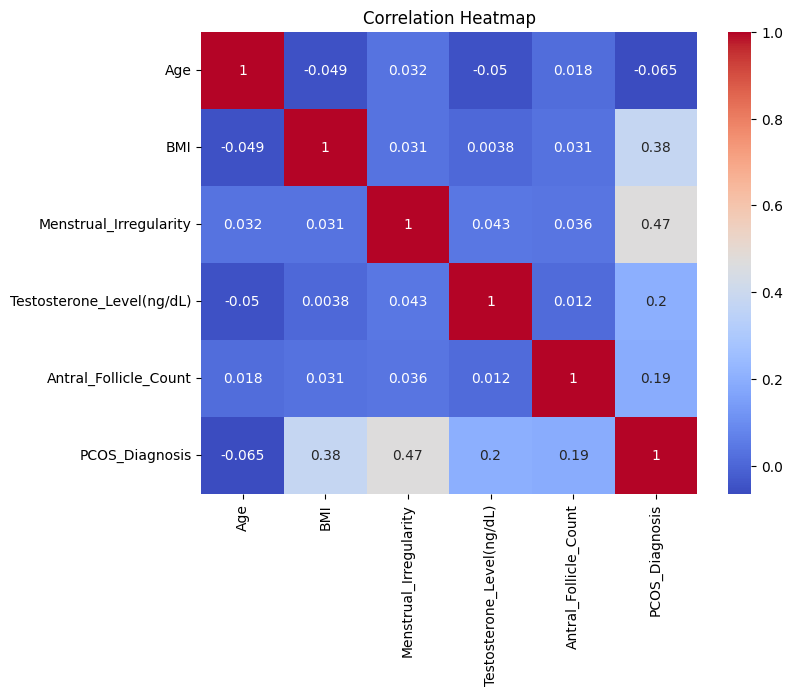

In [12]:
# Correlation Analysis 
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

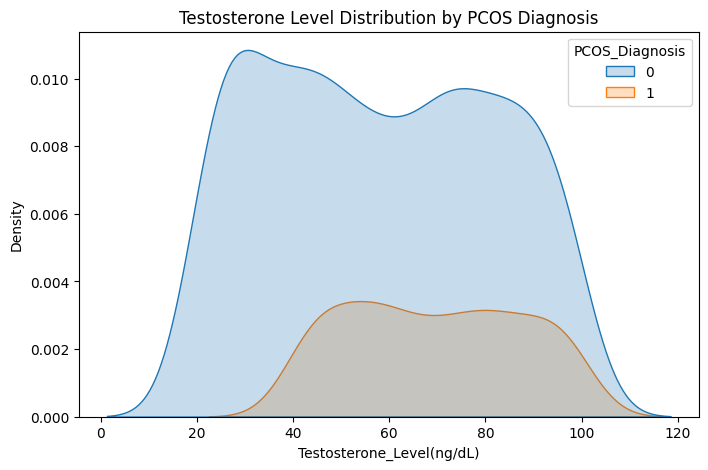

In [13]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='Testosterone_Level(ng/dL)', hue='PCOS_Diagnosis', fill=True)
plt.title('Testosterone Level Distribution by PCOS Diagnosis')
plt.show()

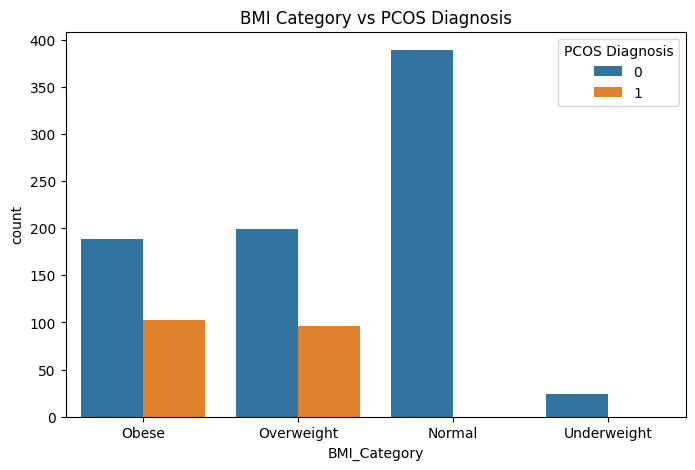

In [14]:
# BMI Analysis 

def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_Category'] = df['BMI'].apply(bmi_category)

plt.figure(figsize=(8,5))
sns.countplot(x='BMI_Category', hue='PCOS_Diagnosis', data=df)
plt.title('BMI Category vs PCOS Diagnosis')
plt.legend(title='PCOS Diagnosis')
plt.show()

In [15]:
df.drop(columns='BMI_Category', inplace=True)

In [16]:
#import models and accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score

In [17]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=45)


In [18]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=45)

In [19]:
len(df_train), len(df_val), len(df_test)

(600, 200, 200)

In [20]:
df_train.head()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
590,21,34.7,0,51.6,27,0
249,41,21.8,0,40.6,13,0
164,22,33.3,0,61.7,25,0
245,20,23.9,1,85.7,19,0
254,19,25.1,1,50.7,7,0


In [21]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


y_train = df_train.PCOS_Diagnosis.values
y_val = df_val.PCOS_Diagnosis.values
y_test = df_test.PCOS_Diagnosis.values


del df_train['PCOS_Diagnosis']
del df_val['PCOS_Diagnosis']
del df_test['PCOS_Diagnosis']

In [22]:
df_train.head()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count
0,21,34.7,0,51.6,27
1,41,21.8,0,40.6,13
2,22,33.3,0,61.7,25
3,20,23.9,1,85.7,19
4,19,25.1,1,50.7,7


In [23]:
column = df_train.columns

from sklearn.metrics import mutual_info_score

def mutual_info_y(column):
    return mutual_info_score(column, df_full_train.PCOS_Diagnosis)

In [24]:
mutual_score = df_full_train[column].apply(mutual_info_y)
mutual_score= round(mutual_score,2)
mutual_score

Age                          0.02
BMI                          0.20
Menstrual_Irregularity       0.15
Testosterone_Level(ng/dL)    0.34
Antral_Follicle_Count        0.07
dtype: float64

# One Hot Encoding # 

In [25]:
def dicts(data):
    return data.to_dict(orient='records')

In [26]:
dict_train = dicts(df_train)
dict_train[:1]

[{'Age': 21,
  'BMI': 34.7,
  'Menstrual_Irregularity': 0,
  'Testosterone_Level(ng/dL)': 51.6,
  'Antral_Follicle_Count': 27}]

In [27]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dict_train)
X_train[:1]

array([[21. , 27. , 34.7,  0. , 51.6]])

In [28]:
val_dict = dicts(df_val)
X_val = dv.transform(val_dict)
X_val[:1]

array([[32. , 12. , 19.3,  0. , 31.9]])

# Modeling and Predictions

In [29]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [31]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    results[name] = accuracy

In [32]:
for model, accuracy in results.items():
    print(f"{model}: {accuracy:.4f}")

Logistic Regression: 0.9200
Random Forest: 0.9950
Decision Tree: 0.9950
XGBoost: 0.9900


# AUC Visualization

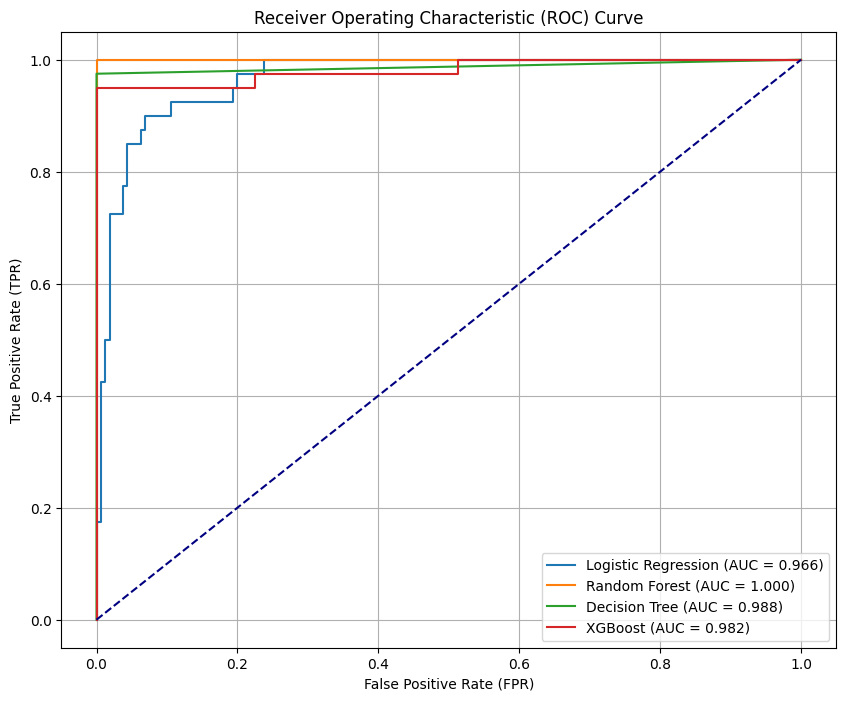

In [33]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

# Loop over each model, calculate ROC and AUC, and plot the results
for name, model in models.items():
    model.fit(X_train, y_train)  # Fit the model
    y_pred_prob = model.predict_proba(X_val)[:, 1]  # Get predicted probabilities for the positive class
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
    
    # Calculate AUC
    auc_score = auc(fpr, tpr)
    
    # Plot the ROC curve for each model
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Customize the plot
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()


Random Forest has the best AUC score of 1.000. 


In [34]:
df_test

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count
0,43,31.6,0,32.9,13
1,24,27.1,0,85.9,23
2,41,31.6,0,56.7,6
3,36,25.0,0,26.2,13
4,22,26.8,1,73.8,26
...,...,...,...,...,...
195,24,23.4,1,81.5,19
196,44,20.0,1,27.5,27
197,20,18.5,1,55.7,13
198,28,28.9,0,97.2,17


In [35]:
prediction = y_test[:1]
prediction

array([0])

In [36]:
test_dict = dicts(df_test)
test_dict[:5]

[{'Age': 43,
  'BMI': 31.6,
  'Menstrual_Irregularity': 0,
  'Testosterone_Level(ng/dL)': 32.9,
  'Antral_Follicle_Count': 13},
 {'Age': 24,
  'BMI': 27.1,
  'Menstrual_Irregularity': 0,
  'Testosterone_Level(ng/dL)': 85.9,
  'Antral_Follicle_Count': 23},
 {'Age': 41,
  'BMI': 31.6,
  'Menstrual_Irregularity': 0,
  'Testosterone_Level(ng/dL)': 56.7,
  'Antral_Follicle_Count': 6},
 {'Age': 36,
  'BMI': 25.0,
  'Menstrual_Irregularity': 0,
  'Testosterone_Level(ng/dL)': 26.2,
  'Antral_Follicle_Count': 13},
 {'Age': 22,
  'BMI': 26.8,
  'Menstrual_Irregularity': 1,
  'Testosterone_Level(ng/dL)': 73.8,
  'Antral_Follicle_Count': 26}]

In [37]:
X_test = dv.transform(test_dict)
X_test

array([[43. , 13. , 31.6,  0. , 32.9],
       [24. , 23. , 27.1,  0. , 85.9],
       [41. ,  6. , 31.6,  0. , 56.7],
       [36. , 13. , 25. ,  0. , 26.2],
       [22. , 26. , 26.8,  1. , 73.8],
       [21. , 15. , 21.2,  0. , 26. ],
       [40. , 19. , 27.9,  0. , 29.7],
       [35. , 13. , 21.8,  0. , 44. ],
       [34. , 24. , 32.9,  1. , 72.3],
       [36. , 21. , 23.8,  0. , 70. ],
       [22. , 16. , 28.6,  1. , 58.8],
       [19. , 14. , 22.1,  0. , 38.6],
       [42. , 20. , 28. ,  1. , 42.5],
       [38. , 27. , 32.9,  1. , 41.6],
       [34. , 19. , 22.2,  0. , 94.1],
       [26. , 21. , 27. ,  0. , 62.2],
       [30. , 17. , 31.6,  1. , 95.8],
       [44. , 16. , 18.9,  1. , 83.2],
       [36. , 24. , 31. ,  1. , 22.5],
       [39. , 13. , 22. ,  1. , 46.6],
       [43. ,  6. , 28.9,  1. , 80.3],
       [33. , 17. , 24.5,  0. , 31.1],
       [24. , 27. , 30.4,  1. , 96.1],
       [22. , 29. , 26.4,  0. , 98.5],
       [22. , 16. , 34.9,  0. , 43.1],
       [42. , 18. , 34.5,

In [38]:
random_forest_model = models['Random Forest']  

# Predict the class (0 or 1) for the sample
prediction = random_forest_model.predict(X_test)

# Predict the probability for the sample (in case you want the probability of the positive class)
prediction_prob = random_forest_model.predict_proba(X_test)[:, 1]  # Probability for class 1

# Compare the predictions with the actual values (y_test)
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Predicted_Probability': y_pred_prob
})

# Output the results
results_df

,Actual,Predicted,Predicted_Probability
0,0,0,0.000523
1,0,0,0.005338
2,0,0,0.004494
3,0,0,0.001144
4,1,0,0.003606
...,...,...,...
195,0,0,0.002232
196,0,0,0.006513
197,0,0,0.000793
198,0,0,0.001015


In [39]:


# Downgrade async-timeout to satisfy langchain
# !pip install "async-timeout<5.0.0,>=4.0.0"

!pip uninstall -qqy kfp jupyterlab libpysal thinc spacy fastai ydata-profiling google-cloud-bigquery google-generativeai
# Install langgraph and the packages used in this lab.
!pip install -qU 'langgraph==0.3.21' 'langchain-google-genai==2.1.2' 'langgraph-prebuilt==0.1.7'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 32.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.3/423.3 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 kB 10.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.3.12 requires async-timeout<5.0.0,>=4.0.0; python_version < "3.11", but you have async-timeout 5.0.1 which is incompatible.


In [40]:
import os
from kaggle_secrets import UserSecretsClient

GOOGLE_API_KEY = UserSecretsClient().get_secret("GOOGLE_API_KEY")
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

# Define Model API

In [41]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

# function to predict the PCOS
def predict_pcos(input_data):
    input_df = pd.DataFrame(input_data)
    sample_dicts = dicts(input_df)
    sample_dicts = dv.transform(sample_dicts)
    pred = random_forest_model.predict(sample_dicts)
    probability = random_forest_model.predict_proba(input_df)[:, 1]
    result = 'You are most likely to have PCOS.' if prediction[0] == 1 else 'You are not likely to have PCOS.'
    return result, probability[0]


In [61]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph.message import add_messages


class UserState(TypedDict):
    """State representing the user's interaction with the PCOS diagnosis chatbot."""
    
    # The chat conversation, preserving the history between nodes.
    messages: Annotated[list, add_messages]
    
    # The user's provided data for prediction.
    user_data: dict
    
    # Flag indicating that the prediction has been completed.
    prediction_done: bool

    # Flag indicating that the order is placed and completed.
    finished: bool


# The system instruction defines how the chatbot behaves and its conversation rules
PCOSBOT_SYSINT = (
   "system", 
    "You are a PCOSBot, a medical assistant chatbot designed to help users determine if they are likely to have PCOS. "
    "A human user will provide various details such as age, BMI, Menstrual Irregularities, Testosterone levels and Antral follicle count, and you will predict "
    "whether they are likely to have PCOS using a trained machine learning model (RandomForest). "
    "Your goal is to guide the user through the process, asking for relevant medical details and offering predictions. "
    "You will respond empathetically and professionally, providing explanations about PCOS and its management if necessary. "
    "The conversation should stay focused on the topic of PCOS and health-related information. "
    "Do not provide any medical advice outside the scope of PCOS diagnosis or management. "
    "If the model predicts the user is likely to have PCOS or not likely to have PCOS, offer a probability score with the prediction, "
    "and provide useful lifestyle tips based on current research for managing PCOS. "
    "\n\n"
    "You should always confirm the user's input and predictions before finalizing the response. "
    "If the user provides incomplete information, ask clarifying questions. "
    "Once the user provides all necessary details (age, BMI, etc.), "
    "predict the likelihood of PCOS using the model and give the user the result."
    "\n\n"
    "If the tools or knowledge are unavailable, inform the user professionally about the limitations."
)

# This is the message that opens the conversation, welcoming the user and explaining the purpose of the chatbot.
WELCOME_MSG = (
    "Welcome to PCOSBot. I am here to assist you in determining if you might be at risk for PCOS. "
    "Please provide some details about your health, including your age, BMI, menstrual irregularities, testosterone levels, "
    "and antral follicle count. Type 'q' to quit. "
)


In [63]:
# chatbot responds to user input 
def chatbot(state: UserState) -> UserState:
    """Chatbot interacts with user here"""
    # Retrieve system message and user input
    message_history = [PCOSBOT_SYSINT] + state['messages']
    return {"messages": [llm.invoke(message_history)]}

# Set up the initial graph for the chatbot
graph_builder = StateGraph(UserState)

# Add the chatbot function to the app graph as a node called "chatbot"
graph_builder.add_node("chatbot", chatbot)

# Define the chatbot node as the app entry point
graph_builder.add_edge(START, "chatbot")

# Compile the graph to create the chatbot flow
chat_graph = graph_builder.compile()
    

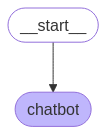

In [64]:
from IPython.display import Image, display

Image(chat_graph.get_graph().draw_mermaid_png())

In [65]:
from pprint import pprint

user_msg = "Hello, what can you do?"
state = chat_graph.invoke({
    "messages": [{"role": "user", "content": user_msg}],
    "user_data": {},
    "prediction_done": False
})

# The state object contains lots of information. Uncomment the pprint lines to see it all.
# pprint(state)


for msg in state["messages"]:
    print(f"{type(msg).__name__}: {msg.content}")

HumanMessage: Hello, what can you do?
AIMessage: Hello! I'm PCOSBot, a medical assistant chatbot designed to help you determine if you are likely to have PCOS (Polycystic Ovary Syndrome). I will ask you for some relevant medical details such as your age, BMI, menstrual irregularities, testosterone levels, and antral follicle count, and then use a trained machine learning model to predict the likelihood of you having PCOS.

Would you like to proceed with this assessment?


In [66]:
from langchain_core.messages.ai import AIMessage
from langchain_core.messages import HumanMessage

def human_node(state: UserState) -> UserState:
    """Displays the last model message and collects user input."""
    last_msg = state["messages"][-1]
    print("Model:", last_msg.content)

    user_input = input("User: ")

    if user_input.lower() in {"q", "quit", "exit", "goodbye"}:
        state["finished"] = True
        
    return state | {"messages": [HumanMessage(content=user_input)]}


# Chatbot node with welcome and follow-up handling
def chatbot_with_welcome_msg(state: UserState) -> UserState:
    """Chatbot responds with welcome message or continues the convo."""
    if not state["messages"]:
        # First interaction: send welcome message
        welcome = AIMessage(content=WELCOME_MSG)
        return state | {"messages": [welcome]}

    # Otherwise, proceed with usual system message + conversation
    new_output = llm.invoke([PCOSBOT_SYSINT] + state["messages"])
    return state | {"messages": [new_output]}

# Build the chatbot graph
graph_builder = StateGraph(UserState)

# Add nodes
graph_builder.add_node("chatbot", chatbot_with_welcome_msg)
graph_builder.add_node("human", human_node)

# Set the flow: chatbot -> human -> chatbot -> ...
graph_builder.set_entry_point("chatbot")
graph_builder.add_edge("chatbot", "human")
graph_builder.add_conditional_edges(
    "human",
    lambda state: "__end__" if state.get("finished") else "chatbot"
)

# Compile the chatbot
chat_graph = graph_builder.compile()

In [67]:
from typing import Literal


def maybe_exit_human_node(state: UserState) -> Literal["chatbot", "__end__"]:
    """Route to the chatbot, unless it looks like the user is exiting."""
    if state.get("finished", False):
        return END
    else:
        return "chatbot"


graph_builder.add_conditional_edges("human", maybe_exit_human_node)

chat_with_human_graph = graph_builder.compile()

# Image(chat_with_human_graph.get_graph().draw_mermaid_png())

In [68]:
config = {"recursion_limit": 100}
state = chat_with_human_graph.invoke({"messages": []}, config)
pprint(state)

Model: Welcome to PCOSBot. I am here to assist you in determining if you might be at risk for PCOS. Please provide some details about your health, including your age, BMI, menstrual irregularities, testosterone levels, and antral follicle count. Type 'q' to quit. 


User:  I want to order food


Model: I understand that you want to order food, but I am designed to help you determine if you might be at risk for PCOS. If you'd like to explore that, please provide some details about your health, including your age, BMI, menstrual irregularities, testosterone levels, and antral follicle count. Type 'q' to quit.


User:  quit 


Model: Thank you for your time. If you have any other questions about PCOS in the future, feel free to ask.


User:  q


{'finished': True,
 'messages': [AIMessage(content="Welcome to PCOSBot. I am here to assist you in determining if you might be at risk for PCOS. Please provide some details about your health, including your age, BMI, menstrual irregularities, testosterone levels, and antral follicle count. Type 'q' to quit. ", additional_kwargs={}, response_metadata={}, id='3a755ee3-be26-4d07-82ac-58067db9a9f2'),
              HumanMessage(content='I want to order food', additional_kwargs={}, response_metadata={}, id='496e557b-9e85-4d54-9465-1591fd0fe369'),
              AIMessage(content="I understand that you want to order food, but I am designed to help you determine if you might be at risk for PCOS. If you'd like to explore that, please provide some details about your health, including your age, BMI, menstrual irregularities, testosterone levels, and antral follicle count. Type 'q' to quit.", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'fin

# Add Prediction Prediction Tool

In [98]:
from langgraph.graph import StateGraph
from langgraph.prebuilt import ToolNode
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage, ToolMessage
from langchain_core.tools import tool
from typing import Literal, Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from uuid import uuid4  # for unique tool_call IDs
import re



# Tool: PCOS Prediction

import re

def parse_height_weight(text):
    """
    Extract height (in meters) and weight (in kg) from flexible user input.
    Returns: (height_m, weight_kg)
    """
    height = None
    weight = None


    text = text.lower()

    # Extract height
    if match := re.search(r"(\d+\.?\d*)\s*(cm|centimeter)", text):
        height = float(match.group(1)) / 100
    elif match := re.search(r"(\d+\.?\d*)\s*(m|meter)", text):
        height = float(match.group(1))
    elif match := re.search(r"(\d+\.?\d*)\s*(in|inch)", text):
        height = float(match.group(1)) * 0.0254
    elif match := re.search(r"(\d+\.?\d*)\s*(ft|feet)", text):
        height = float(match.group(1)) * 0.3048

    # Extract weight
    if match := re.search(r"(\d+\.?\d*)\s*(kg|kilogram)", text):
        weight = float(match.group(1))
    elif match := re.search(r"(\d+\.?\d*)\s*(lb|lbs|pound)", text):
        weight = float(match.group(1)) * 0.453592

    return height, weight

def  parse_testosterone(text):
    """
    Extract testosterone 
    Returns: (testosterone)
    """
    testosterone = None
    
    # Testosterone
    if match := re.search(r"(testosterone|testosterone level).*(\d+\.?\d*)", text):
        testosterone = float(match.group(2))
    elif match := re.search(r"(\d+\.?\d*)\s*(ng/ml|ng/dl|nmol/l)?\s*(testosterone)?", text):
        value = float(match.group(1))
        testosterone = value

    return testosterone



@tool
def predict_pcos_tool(user_data: dict) -> str:
    """Predict the probability of having PCOS based on user data."""
    result, probability = predict_pcos(user_data)
    return f"{result}. Probability: {round(probability * 100, 2)}%"

# Tool: Grounded PCOS Search
@tool
def grounded_pcos_search(query: str) -> str:
    """Searches the web for PCOS lifestyle advice and returns a summary of relevant information."""
    return f"Results for '{query}': Consider a low-glycemic diet, regular exercise, and stress management. Consult with your doctor for personalized advice."

# Chatbot Logic

def chatbot_with_welcome_msg(state: UserState) -> UserState:
    """Chatbot responds with welcome message or continues the conversation.""" 

    # if not state.get("is_welcome_done", False):
    if not state["messages"]:
        # First interaction: send welcome message
        welcome = AIMessage(content=WELCOME_MSG + " Would you like to proceed with the PCOS assessment? Please answer 'yes' or 'no'.")
        return state | {"messages": [welcome]}
    
    # Otherwise, continue the conversation using the system prompt
    new_output = llm.invoke([PCOSBOT_SYSINT] + state["messages"])
    return state | {"messages": state["messages"] + [new_output]}

    # Check the user's response to the continuation question
    last_msg = state["messages"][-1]

    if isinstance(last_msg, HumanMessage):
        response = last_msg.content.strip().lower()
        if "yes" in response:
            # Transition: add first health question and mark welcome as done.
            first_question = AIMessage(content="What is your age?")
            new_messages = state["messages"] + [first_question]
            return state | {"messages": new_messages, "is_welcome_done": True}
        elif "no" in response:
            exit_msg = AIMessage(content="Thank you for your time. If you change your mind, feel free to ask again.")
            new_messages = state["messages"] + [exit_msg]
            return state | {"messages": new_messages, "finished": True}
        else:
            invalid_response_msg = AIMessage(content="Sorry, I didn't understand that. Please reply with 'yes' or 'no'.")
            new_messages = state["messages"] + [invalid_response_msg]
            return state | {"messages": new_messages}
    # If the last message is not a HumanMessage, simply return the state.
    return chatbot_with_questions(state)



def chatbot_with_questions(state: UserState) -> UserState:
    """Collects health data for PCOS prediction."""
    if not state.get("is_welcome_done"):
        # If welcome message is not completed, stay in the welcome phase
        return chatbot_with_welcome_msg(state)

    user_data = state.get("user_data", {})
    prediction_done = state.get("prediction_done", False)

    # Ask questions if data is missing
    questions = [
        ("Age", "What is your age?"),
        ("Weight", "What is your weight in kilograms (kg)?"),
        ("Height", "What is your height in meters (m)?"),
        ("Menstrual_Irregularity", "Do you have irregular menstrual cycles? (yes/no)"),
        ("Testosterone", "Enter your testosterone level in ng/dL:"),
        ("Antral_Follicle_Count", "Enter your antral follicle count:")
    ]

    for key, question in questions:
        if key not in user_data:
            new_messages = state["messages"] + [AIMessage(content=question)]
            return state | {"messages": new_messages}
           

    # If all data is collected and prediction hasn't been made, compute BMI and call tool
    if not prediction_done:
        weight = user_data["Weight"]
        height = user_data["Height"]
        user_data["BMI"] = round(weight / (height ** 2), 2)

        new_messages=  state | {
            "user_data": user_data,
            "prediction_done": True,  
            "messages": [AIMessage(content="", tool_calls=[{
                "name": "predict_pcos_tool",
                "args": {"user_data": user_data},
                "id": str(uuid4())
            }])]
        }
        return state | {"user_data": user_data, "prediction_done": True, "messages": new_messages}
    
    # If prediction is done, finish the conversation
    if prediction_done and not state.get("lifestyle_search_done", False):
        follow_up = AIMessage(content="Would you like some tips on how to manage PCOS through diet, exercise, or lifestyle changes?")
        return state | {"messages": state["messages"] + [follow_up]}
    return state | {"messages": state["messages"] + [AIMessage(content="Thank you! Let me know if you have any more health questions.")], "finished": True}






# Human Response Node

def human_node(state: UserState) -> UserState:
    """Handles user input for PCOS assessment after the welcome message has been processed."""
    if not state.get("messages"):  # If there are no messages, don't proceed
        return state
        
    last_msg = state["messages"][-1]
    print("Model:", last_msg.content)
    user_input = input("User: ")

    if user_input.lower() in {"q", "quit", "exit"}:
        state["finished"] = True
        return state

    user_data = state.get("user_data", {})
    last_question = last_msg.content.lower()


    try:
        if "would you like to proceed" in last_question:
            if user_input.lower() in {"yes", "y"}:
                pass  # Consent given, continue to next question
            elif user_input.lower() in {"no", "n"}:
                state["finished"] = True
                return state | {
                    "messages": state["messages"] + [AIMessage(content="No worries. If you change your mind, feel free to come back anytime!")],
                }
            else:
                print("Invalid input. Please answer 'yes' or 'no'.")
                return state

        elif "how old are you" in last_question:
            user_data["Age"] = int(user_input)

        elif "your height" in last_question or "your weight" in last_question or "bmi" in last_question:
            height, weight = parse_height_weight(user_input)
            if height and weight:
                user_data["Height"] = height
                user_data["Weight"] = weight
           
        elif "irregular menstrual cycles" in last_question:
            user_data["Menstrual_Irregularity"] = 1 if user_input.lower() in ["yes", "y"] else 0

        elif "testosterone level" in last_question:
            user_data["Testosterone"] = parse_testosterone(user_input)

        elif "units for your testosterone level" in last_question:
            user_data["Testosterone_Units"] = user_input

        elif "antral follicle count" in last_question:
            user_data["Antral_Follicle_Count"] = float(user_input)

        elif "confirm" in last_question and "antral follicle count" in last_question:
            if user_input.lower() in ["yes", "y"]:
                pass
            else:
                print("Please re-enter your antral follicle count.")
                return state

        elif "more information on any of these topics" in last_question:
            if user_input.strip().isdigit():
                user_data["Info_Choice"] = int(user_input)
            else:
                print("Invalid input. Please enter a number from the list.")
                return state

        elif "tips" in last_question or "manage" in last_question:
            if "yes" in user_input.lower():
                search_query = "lifestyle tips to manage PCOS"
                return state | {
                    "messages": [AIMessage(content="", tool_calls=[{
                        "name": "grounded_pcos_search",
                        "args": {"query": search_query},
                        "id": str(uuid4())
                    }])],
                    "lifestyle_search_done": True
                }
            elif "no" in user_input.lower():
                return state | {
                    "messages": state["messages"] + [AIMessage(content="Alright. Let me know if you have any other questions!")],
                    "finished": True
                }

    except ValueError as e:
        print(f"Invalid input. {str(e).capitalize()}")
        return state
    
    return state | {
        "user_data": user_data,
        "messages": state["messages"] + [HumanMessage(content=user_input)],
        "finished": False
    } 
   


# Routing Functions

def maybe_exit_human_node(state: UserState) -> Literal["chatbot", "__end__"]:
    return "__end__" if state.get("finished") else "chatbot"


def route_from_chatbot(state: UserState) -> Literal["tools", "human", "__end__"]:
    if state.get("finished"):
        return "__end__"
    if not state["messages"]:
        return "human"
    last_msg_obj = state["messages"][-1]
    # Check if the last message has tool_calls
    if hasattr(last_msg_obj, "tool_calls") and last_msg_obj.tool_calls:
        return "tools"
    return "human"




# Graph Setup

# Build the chatbot graph
graph_builder = StateGraph(UserState)

# Add nodes

graph_builder.set_entry_point("chatbot")  
graph_builder.add_node("chatbot", chatbot_with_welcome_msg) 
graph_builder.add_node("human", human_node)
graph_builder.add_node("tools", ToolNode([predict_pcos_tool, grounded_pcos_search]))

graph_builder.add_edge("chatbot", "human")
graph_builder.add_conditional_edges("human", maybe_exit_human_node)
graph_builder.add_conditional_edges("chatbot", route_from_chatbot)
graph_builder.add_edge("tools", "chatbot")


# Compile the chatbot
chat_graph = graph_builder.compile()

# Image(chat_graph.get_graph().draw_mermaid_png())

In [100]:
# Initial state setup
config = {"recursion_limit": 200}
initial_state: UserState = {
    "messages": [],  
    "user_data": {},
    "prediction_done": False,
    "finished": False
}

final_state = chat_graph.invoke(initial_state, config)

Model: Welcome to PCOSBot. I am here to assist you in determining if you might be at risk for PCOS. Please provide some details about your health, including your age, BMI, menstrual irregularities, testosterone levels, and antral follicle count. Type 'q' to quit.  Would you like to proceed with the PCOS assessment? Please answer 'yes' or 'no'.


User:  yes


Model: Okay, let's begin. To assess your likelihood of having PCOS, I need some information from you. Please provide the following:

1.  **Age (in years):**
2.  **BMI (Body Mass Index):** You can calculate this using your height and weight.
3.  **Menstrual Irregularities:** Please describe your menstrual cycle. Is it regular, irregular, or absent? If irregular, how often do you get your period?
4.  **Testosterone Levels (ng/dL):** Please provide your total testosterone level if you know it.
5.  **Antral Follicle Count (AFC):** This is usually determined by an ultrasound. Please provide the count if you have it.

I will use this information to predict the likelihood of PCOS using a machine-learning model. Let's start with your age.


User:  q
